In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
cd348_stats <- 
    read_tsv(
        './cd3-cd4-cd8-stats.tsv',
        col_types=cols(
            `Replicate`=col_factor(levels=c('R1', 'R2', 'R3')),
            `Bead:cell ratio`=col_factor(levels=c('0:1', '1:1', '1:2', '1:4')),
            .default=col_double()
        )
    )
cd348_stats

Replicate,Bead:cell ratio,Live cells/CD3+ | Freq. of Parent (%),Live cells/CD3- | Freq. of Parent (%),Live cells/CD3+/CD3+ CD8- CD4+ | Freq. of Parent (%),Live cells/CD3+/CD3+ CD8+ CD4- | Freq. of Parent (%)
R1,0:1,29.1,70.9,37.8,17.1
R1,1:1,88.7,11.3,71.4,15.8
R1,1:2,81.6,18.4,77.2,17.8
R1,1:4,73.9,26.1,76.9,18.5
R2,0:1,47.5,52.5,77.5,18.3
R2,1:1,89.0,11.0,78.7,16.4
R2,1:2,74.1,25.9,78.5,16.1
R2,1:4,72.5,27.5,77.2,18.6
R3,0:1,48.5,51.5,77.3,18.6
R3,1:1,88.6,11.4,79.5,15.3


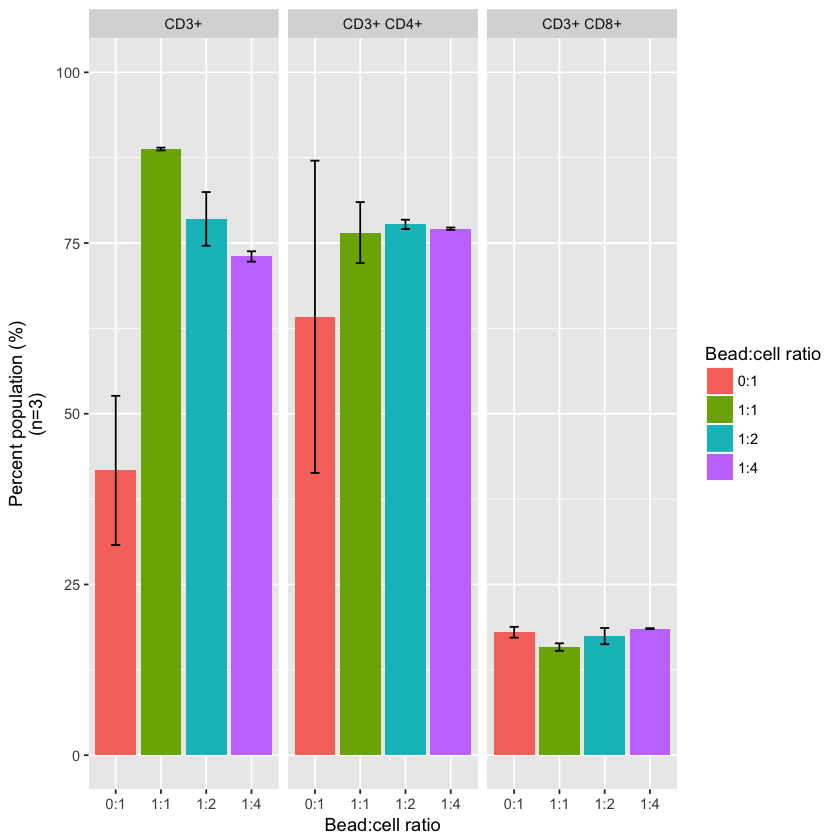

In [3]:
cd348_grp <- cd348_stats %>% group_by(`Bead:cell ratio`)

rbind(
    cd348_grp %>%
    summarize(
        `Freq_mean`=mean(`Live cells/CD3+ | Freq. of Parent (%)`),
        `Freq_sd`=sd(`Live cells/CD3+ | Freq. of Parent (%)`)
    ) %>%
    mutate(`Population`="CD3+"),
    cd348_grp %>%
    summarize(
        `Freq_mean`=mean(`Live cells/CD3+/CD3+ CD8- CD4+ | Freq. of Parent (%)`),
        `Freq_sd`=sd(`Live cells/CD3+/CD3+ CD8- CD4+ | Freq. of Parent (%)`),        
    ) %>%
    mutate(`Population`="CD3+ CD4+"),
    cd348_grp %>%
    summarize(
        `Freq_mean`=mean(`Live cells/CD3+/CD3+ CD8+ CD4- | Freq. of Parent (%)`),
        `Freq_sd`=sd(`Live cells/CD3+/CD3+ CD8+ CD4- | Freq. of Parent (%)`)
    ) %>%
    mutate(`Population`="CD3+ CD8+")
) %>%
mutate(`Population`=factor(`Population`)) %>%
ggplot(aes(x=`Bead:cell ratio`, y=`Freq_mean`, fill=`Bead:cell ratio`)) +
    geom_col() +
    geom_errorbar(
            aes(ymin=`Freq_mean`-`Freq_sd`, ymax=`Freq_mean`+`Freq_sd`),
            width=0.2
    ) +
    facet_wrap(~Population) +
    ylim(0, 100) +
    ylab('Percent population (%)\n(n=3)')


| Cell count (106 live cells/ml) | 1:1 | 1:2 | 1:4 | 1:8 |
| ------------------------------ | --- | --- | --- | --- |
| #1| 3.21 (96%) | 4.16 (93%) | 4.91 (78%) | 5.01 (69%) |
| #2 | 4.72 (96%) | 3.95 (91%) | 4.81 (75%) | 4.95 (70%) |